<a href="https://colab.research.google.com/github/rainnn99/DataAnalysis_Airbnb/blob/main/DataAnalysis_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)
df = pd.read_csv('/content/drive/MyDrive/project/Airbnb/Airbnb_list_in_tokyo.csv', encoding='cp949')
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shibuya District,4,"['email', 'phone']",4,1 bath,NaN,"[""First aid kit"", ""Stove"", ""Hangers"", ""Bed lin...","9,264.00",180,2,2,1125,1125,2015-04-05,2021-12-30,4.62,4.3,M130005396,t,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
df = df.loc[:, ~df.columns.str.contains('Unnamed:')]
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,f
1,Shibuya District,4,"['email', 'phone']",4,1 bath,NaN,"[""First aid kit"", ""Stove"", ""Hangers"", ""Bed lin...","9,264.00",180,2,2,1125,1125,2015-04-05,2021-12-30,4.62,4.3,M130005396,t,4,4,0,0,NaN
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,4.87,4.61,4.77,9


In [356]:
df.shape

(13356, 24)

In [357]:
#csv데이터 세트에 밀린값들이 많아(ex. 위의 1) 처리가 힘들어 밀린 값들을 삭제하기 위한 작업
column_name = 'host_is_superhost'
df = df[df[column_name].isin(['t', 'f'])]

In [358]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,f
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,4.87,4.61,4.77,9
3,within an hour,100%,t,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,NaN,1,"[""Luggage dropoff allowed"", ""Private entrance""...","8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,f


In [359]:
df.shape

(6550, 24)

In [360]:
df.isnull().sum()

host_response_time              332
host_response_rate              332
host_is_superhost                 0
neighbourhood_cleansed           28
latitude                         11
longitude                         3
room_type                         0
accommodates                      0
bathrooms_text                   14
bedrooms                       1045
beds                            276
amenities                         0
price                             0
availability_90                   3
availability_365                  3
number_of_reviews                 3
review_scores_rating            655
review_scores_accuracy          656
review_scores_cleanliness       656
review_scores_checkin           656
review_scores_communication     657
review_scores_location          695
review_scores_value             770
instant_bookable                117
dtype: int64

In [361]:
unique_values = df['host_response_time'].unique()
print(unique_values)

['within a day' 'within an hour' 'within a few hours' nan " 'phone'"
 'a few days or more' '1' '4' '28'
 'From the ryokan, walk about 10 minutes, there are convenience stores, supermarkets. Walking to the Sensoji Temple, there will be commercial facilities, various shops, restaurants and so on. You can also take a water bus tour nearby.<br />From Thunder gate to Sensoji Temple, there is a street called Nakamise, which has many souvenirs and snack shops. For example, the famous [?룔걡?볝걮], [雅뷴숱??, [?귙겒??, [?귙걩?얇굯?섅굝?? and so on.<br />You can take a water bus to see the scenery of Tokyo?셲 Sumida River. Especially the cherry blossom season, very beautiful??,https://a0.muscache.com/pictures/c4fef331-166a-4fdc-8c5c-54f1a7d087a4.jpg,224733946,https://www.airbnb.com/users/show/224733946,?듐겗若?2018-11-07,,",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/cdb3961a-07ef-4853-ad9e-3afd555259a7.jpg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/cdb3961a-07ef-485

In [362]:
#밀린 값들을 삭제하기 위한 작업2 (1차 host_is_superhost, 2차 host_response_time)
df = df[df['host_response_time'].isin(['within an hour', 'within a few hours', 'within a day', 'a few days or more'])]
unique_values = df['host_response_time'].unique()
print(unique_values)

['within a day' 'within an hour' 'within a few hours' 'a few days or more']


In [363]:
#밀린 값 삭제후 결측치 확인
df.shape
df.isnull().sum()

host_response_time               0
host_response_rate               0
host_is_superhost                0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms_text                  14
bedrooms                       975
beds                           265
amenities                        0
price                            0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating           571
review_scores_accuracy         572
review_scores_cleanliness      572
review_scores_checkin          572
review_scores_communication    572
review_scores_location         572
review_scores_value            572
instant_bookable                 0
dtype: int64

값 변환, 결측치 처리

In [364]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100%,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,"[""Microwave"", ""Hangers"", ""Kitchen"", ""Fire exti...","12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,f
2,within an hour,100%,t,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,"[""Kitchen"", ""TV"", ""Fire extinguisher"", ""Essent...","7,419.00",90,90,61,4.8,4.9,4.85,4.93,4.87,4.61,4.77,9
3,within an hour,100%,t,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,NaN,1,"[""Luggage dropoff allowed"", ""Private entrance""...","8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,f


In [365]:
#결측값 처리
#review_ => 평균대치

target_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
for column in target_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# 결측치 평균대치
for column in target_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

host_response_time               0
host_response_rate               0
host_is_superhost                0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms_text                  14
bedrooms                       975
beds                           265
amenities                        0
price                            0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
instant_bookable                 0
dtype: int64

In [366]:
# bedrooms_text, bedrooms, beds => 0 이유 : 직접 데이터셋에 가서 확인했을때 값이 없는 경우는 보유하고 있지않은 0으로 추정됨.
target_columns = ['bathrooms_text', 'bedrooms', 'beds']
for column in target_columns:
  df[column].fillna("0", inplace=True)
df.isnull().sum()

host_response_time             0
host_response_rate             0
host_is_superhost              0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [367]:
df.dtypes

host_response_time              object
host_response_rate              object
host_is_superhost               object
neighbourhood_cleansed          object
latitude                        object
longitude                       object
room_type                       object
accommodates                    object
bathrooms_text                  object
bedrooms                        object
beds                            object
amenities                       object
price                           object
availability_90                 object
availability_365                object
number_of_reviews               object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
dtype: object

In [368]:
unique_values = df['bathrooms_text'].unique()
print(unique_values)

['1 bath' '1 shared bath' '1.5 shared baths' '1.5 baths' '2 baths'
 '2 shared baths' '1 private bath' 'Shared half-bath' '0 shared baths'
 '3 shared baths' '2.5 baths' '3 baths' 'Half-bath' '5.5 baths' '0'
 '19.5 baths' '2.5 shared baths' '4 baths' '4 shared baths'
 '5 shared baths' '5 baths' '0 baths' '6 baths' '7 baths' '11 baths'
 '3.5 shared baths' '3.5 baths' '10 baths' '6 shared baths'
 'Private half-bath']


In [369]:
#0,1 의 값들을 t,f로 변환
column_name = 'instant_bookable'
df[column_name] = np.where(df[column_name] == 'f', df[column_name], 't')
unique_values = df['instant_bookable'].unique()
print(unique_values)

['f' 't']


In [370]:
change_val = {"f" : 0, "t" : 1}
df['instant_bookable'] = df['instant_bookable'].map(change_val)
unique_values = df['instant_bookable'].unique()
print(unique_values)

[0 1]


In [371]:
df['host_is_superhost'] = df['host_is_superhost'].map(change_val)
unique_values = df['host_is_superhost'].unique()
print(unique_values)

[1 0]


In [372]:
#amenities변수를 개수로 변환
df['amenities'] = df['amenities'].apply(lambda x: x.count(','))
df['amenities'].astype(int)
df['amenities'] = df['amenities'] + 1

In [373]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100%,1,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,21,"12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,0
2,within an hour,100%,1,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,14,"7,419.00",90,90,61,4.80,4.90,4.85,4.93,4.87,4.61,4.77,1
3,within an hour,100%,1,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,0,1,23,"8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,0


In [374]:
# x%로 되어있는 컬럼 %제거후 int로 변환
column_name = 'host_response_rate'
df[column_name] = df[column_name].apply(lambda x: x.replace('%', ''))
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,within a day,100,1,Sumida Ku,35.71707,139.82608,Entire home/apt,2,1 bath,1,2,21,"12,000.00",0,39,174,4.77,4.74,4.92,4.84,4.83,4.53,4.79,0
2,within an hour,100,1,Nakano Ku,35.73445,139.63139,Entire home/apt,2,1 bath,1,1,14,"7,419.00",90,90,61,4.80,4.90,4.85,4.93,4.87,4.61,4.77,1
3,within an hour,100,1,Kita Ku,35.73844,139.76917,Private room,1,1 shared bath,0,1,23,"8,902.00",0,116,248,4.98,4.96,4.92,4.98,4.98,4.84,4.91,0


In [375]:
#int로 사용해야하지만 dtype가 obj인 경우 int로 형변환
column_name = ['host_response_rate','host_is_superhost','accommodates','bedrooms','beds','availability_90','availability_365',
               'number_of_reviews','instant_bookable']
df[column_name].astype(int)

,host_response_rate,host_is_superhost,accommodates,bedrooms,beds,availability_90,availability_365,number_of_reviews,instant_bookable
0,100,1,2,1,2,0,39,174,0
2,100,1,2,1,1,90,90,61,1
3,100,1,1,0,1,0,116,248,0
4,100,1,6,2,4,20,166,194,1
5,100,1,2,1,1,77,77,128,1
...,...,...,...,...,...,...,...,...,...
13345,100,0,2,1,1,69,69,0,1
13346,100,0,3,1,3,65,65,0,1
13349,100,0,9,2,1,90,270,0,1
13350,100,0,2,1,1,75,76,0,1


In [376]:
#int로 변환되지 않는 값들 발견하여 pd.to_numeric로 처리
column_names = ['host_response_rate','accommodates', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews']

for col in column_names:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
df.dtypes

host_response_time              object
host_response_rate               Int64
host_is_superhost                int64
neighbourhood_cleansed          object
latitude                        object
longitude                       object
room_type                       object
accommodates                     Int64
bathrooms_text                  object
bedrooms                         Int64
beds                             Int64
amenities                        int64
price                           object
availability_90                  Int64
availability_365                 Int64
number_of_reviews                Int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
dtype: object

In [377]:
column_names = ['latitude', 'longitude']
for col in column_names:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
df.dtypes

host_response_time              object
host_response_rate               Int64
host_is_superhost                int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     Int64
bathrooms_text                  object
bedrooms                         Int64
beds                             Int64
amenities                        int64
price                           object
availability_90                  Int64
availability_365                 Int64
number_of_reviews                Int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
dtype: object

In [378]:
#10,000 식으로 나와있는 price를 ,를 제거하고 folat로 변환
column_name = 'price'
df[column_name] = df[column_name].apply(lambda x: float(x.replace(',', '')))

In [379]:
df.dtypes

host_response_time              object
host_response_rate               Int64
host_is_superhost                int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     Int64
bathrooms_text                  object
bedrooms                         Int64
beds                             Int64
amenities                        int64
price                          float64
availability_90                  Int64
availability_365                 Int64
number_of_reviews                Int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
dtype: object

In [380]:
#리뷰 총점은 아래 리뷰값들의 평균이기 때문에 타 구간변수와의 비교를 위해 리뷰에 넣지 않고, 이 df에서 작업
cols = ['host_response_rate', 'accommodates','beds','amenities','availability_90','availability_365', 'review_scores_rating']
df_section = df[cols].copy()
df_section.head(3)

,host_response_rate,accommodates,beds,amenities,availability_90,availability_365,review_scores_rating
0,100,2,2,21,0,39,4.77
2,100,2,1,14,90,90,4.80
3,100,1,1,23,0,116,4.98


In [381]:
cols=['number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
df_sec_review = df[cols].copy()
df_sec_review.head(3)

,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,174,4.74,4.92,4.84,4.83,4.53,4.79
2,61,4.90,4.85,4.93,4.87,4.61,4.77
3,248,4.96,4.92,4.98,4.98,4.84,4.91


In [382]:
#구간변수 기초통계량 확인
df_section.describe()

,host_response_rate,accommodates,beds,amenities,availability_90,availability_365,review_scores_rating
count,6101.0,6101.0,6101.0,6101.000000,6101.0,6101.0,6101.000000
mean,99.030323,4.206851,2.452057,30.082773,41.395181,138.856745,4.674664
std,5.635185,2.884241,2.035796,10.157523,26.677959,99.941262,0.315553
min,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000
25%,100.0,2.0,1.0,23.000000,19.0,60.0,4.580000
50%,100.0,3.0,2.0,29.000000,41.0,124.0,4.710000
75%,100.0,5.0,3.0,36.000000,63.0,202.0,4.870000
max,100.0,16.0,36.0,93.000000,90.0,365.0,5.000000


In [383]:
df_sec_review.describe()

,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,6101.0,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000
mean,43.353221,4.726616,4.652897,4.759132,4.800950,4.683813,4.618830
std,64.487688,0.288514,0.354662,0.289268,0.262346,0.283430,0.318961
min,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.0,4.660000,4.550000,4.700000,4.750000,4.590000,4.530000
50%,21.0,4.770000,4.710000,4.810000,4.840000,4.710000,4.650000
75%,57.0,4.890000,4.880000,4.930000,4.950000,4.860000,4.800000
max,2023.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: xlabel='review_scores_rating'>

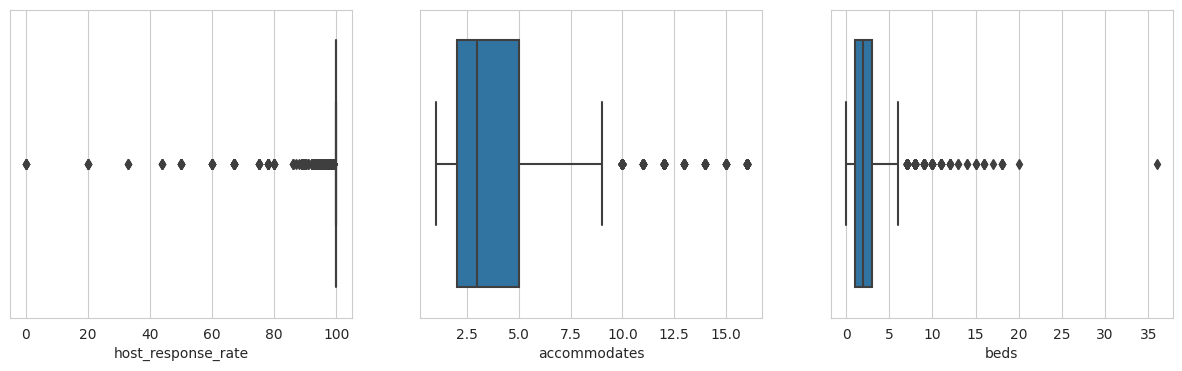

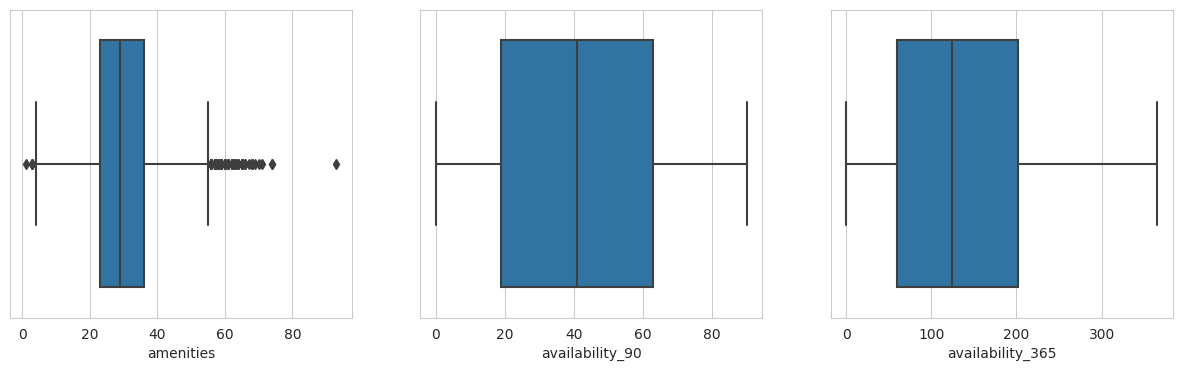

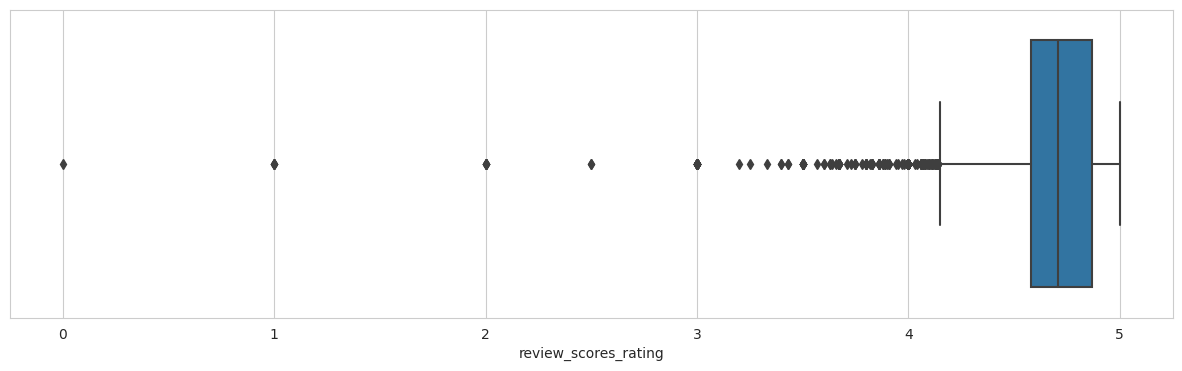

In [384]:
#구간변수 1차 시각화
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(ax=axes[0], x="host_response_rate", data=df_section)
sns.boxplot(ax=axes[1], x="accommodates", data=df_section)
sns.boxplot(ax=axes[2], x="beds", data=df_section)

fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(ax=axes[0], x="amenities", data=df_section)
sns.boxplot(ax=axes[1], x="availability_90", data=df_section)
sns.boxplot(ax=axes[2], x="availability_365", data=df_section)

fig, axes = plt.subplots(1,1,figsize=(15,4))
sns.boxplot(ax=axes, x="review_scores_rating", data=df_section)

<Axes: xlabel='amenities'>

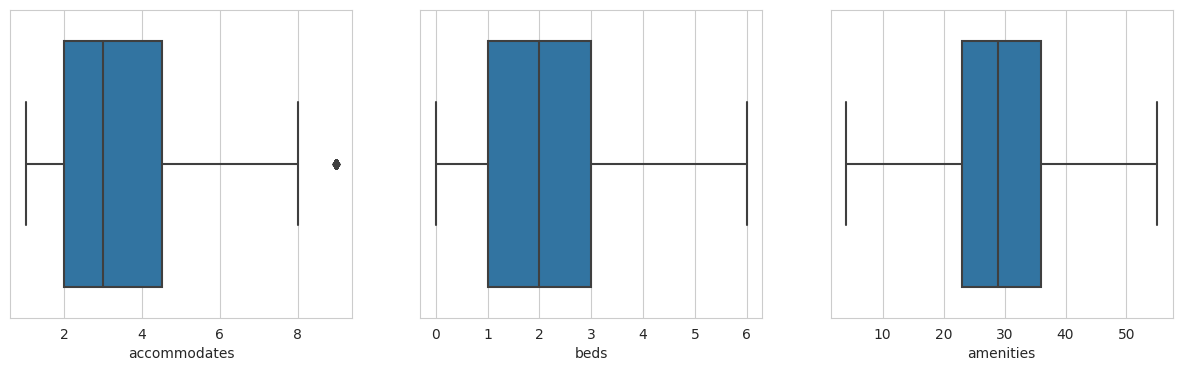

In [385]:
#이상치가 많은것을 확인 할 수 있음, host_response_rate, review_score_rating은 이상치가 있어도 영향이 크다고 생각되어 다른 변수만 처리
#1.5IQR 사용
cols = ['accommodates','beds','amenities']
for column in cols:
  Q1 = df_section[column].quantile(0.25)
  Q3 = df_section[column].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  df_section[column] = df_section[column].apply(lambda x: x if lower_bound <= x <= upper_bound else 1.5*IQR)

#이상값 처리후 재 시각화
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(ax=axes[0], x="accommodates", data=df_section)
sns.boxplot(ax=axes[1], x="beds", data=df_section)
sns.boxplot(ax=axes[2], x="amenities", data=df_section)

In [386]:
unique_values = df_section['host_response_rate'].unique()
print(unique_values)

<IntegerArray>
[100,  94,  86,  90,  80,  97,  99,  87,  98,  89,  92,  20,  93,  95,  75,
  96,   0,  33,  78,  50,  88,  67,  60,  44,  91]
Length: 25, dtype: Int64


In [387]:
#왜도 파악
df_section.skew()

host_response_rate     -10.631097
accommodates             0.844928
beds                     0.860033
amenities                0.165385
availability_90          0.059905
availability_365         0.541064
review_scores_rating    -3.708602
dtype: float64

In [388]:
df_sec_review.skew()

number_of_reviews              7.126606
review_scores_accuracy        -3.900607
review_scores_cleanliness     -3.114546
review_scores_checkin         -4.112798
review_scores_communication   -5.033204
review_scores_location        -2.960233
review_scores_value           -3.299319
dtype: float64

In [389]:
#첨도 파악
df_section.kurtosis()

host_response_rate      139.711788
accommodates              0.064005
beds                      0.355088
amenities                -0.200471
availability_90          -1.107138
availability_365         -0.645606
review_scores_rating     29.459393
dtype: float64

In [390]:
df_sec_review.kurtosis()

number_of_reviews              157.952841
review_scores_accuracy          29.455747
review_scores_cleanliness       18.871417
review_scores_checkin           31.688071
review_scores_communication     44.253321
review_scores_location          18.643300
review_scores_value             22.151747
dtype: float64

In [391]:
df1 = df
cols = ['host_response_rate','review_scores_rating','number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
df1[cols].describe()

,host_response_rate,review_scores_rating,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,6101.0,6101.000000,6101.0,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000
mean,99.030323,4.674664,43.353221,4.726616,4.652897,4.759132,4.800950,4.683813,4.618830
std,5.635185,0.315553,64.487688,0.288514,0.354662,0.289268,0.262346,0.283430,0.318961
min,0.0,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,100.0,4.580000,5.0,4.660000,4.550000,4.700000,4.750000,4.590000,4.530000
50%,100.0,4.710000,21.0,4.770000,4.710000,4.810000,4.840000,4.710000,4.650000
75%,100.0,4.870000,57.0,4.890000,4.880000,4.930000,4.950000,4.860000,4.800000
max,100.0,5.000000,2023.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [392]:
from scipy.stats import boxcox

#로그 변환 및 boxcox 변환
#df1['host_response_rate'] = np.sqrt(df1['host_response_rate'])
df1['review_scores_rating'] = pd.Series(boxcox(df1['review_scores_rating'] + 0.1)[0])
df1['number_of_reviews'] = np.log(df1['number_of_reviews'] + 1)
df1['review_scores_accuracy'] = pd.Series(boxcox(df1['review_scores_accuracy'] + 0.1)[0])
df1['review_scores_cleanliness'] = pd.Series(boxcox(df1['review_scores_cleanliness'] + 0.1)[0])
df1['review_scores_checkin'] = pd.Series(boxcox(df1['review_scores_checkin'] + 0.1)[0])
df1['review_scores_communication'] = pd.Series(boxcox(df1['review_scores_communication'] + 0.1)[0])
df1['review_scores_location'] = pd.Series(boxcox(df1['review_scores_location'] + 0.1)[0])
df1['review_scores_value'] = pd.Series(boxcox(df1['review_scores_value'] + 0.1)[0])
# skewness 확인
df1[cols].skew()

host_response_rate            -10.631097
review_scores_rating           -0.165112
number_of_reviews              -0.355086
review_scores_accuracy         -0.218466
review_scores_cleanliness      -0.229510
review_scores_checkin          -0.318737
review_scores_communication    -0.322434
review_scores_location         -0.160063
review_scores_value            -0.056052
dtype: float64

In [393]:
df1[cols].kurtosis()

host_response_rate             139.711788
review_scores_rating            -0.470722
number_of_reviews               -0.712127
review_scores_accuracy          -0.493472
review_scores_cleanliness       -0.635877
review_scores_checkin           -0.641838
review_scores_communication     -0.620789
review_scores_location          -0.434585
review_scores_value             -0.007351
dtype: float64

<Axes: xlabel='review_scores_rating', ylabel='Count'>

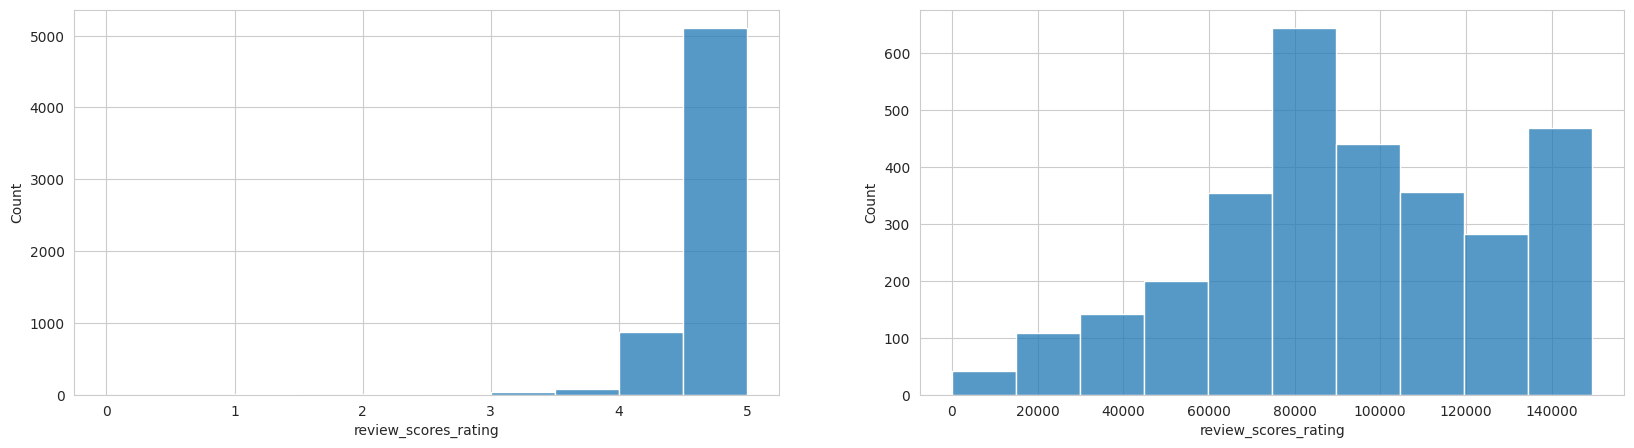

In [400]:
#boxcox 변환 이전 / 이후 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_section, x="review_scores_rating", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_rating", kde=False, bins=10)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

<Axes: xlabel='number_of_reviews', ylabel='Count'>

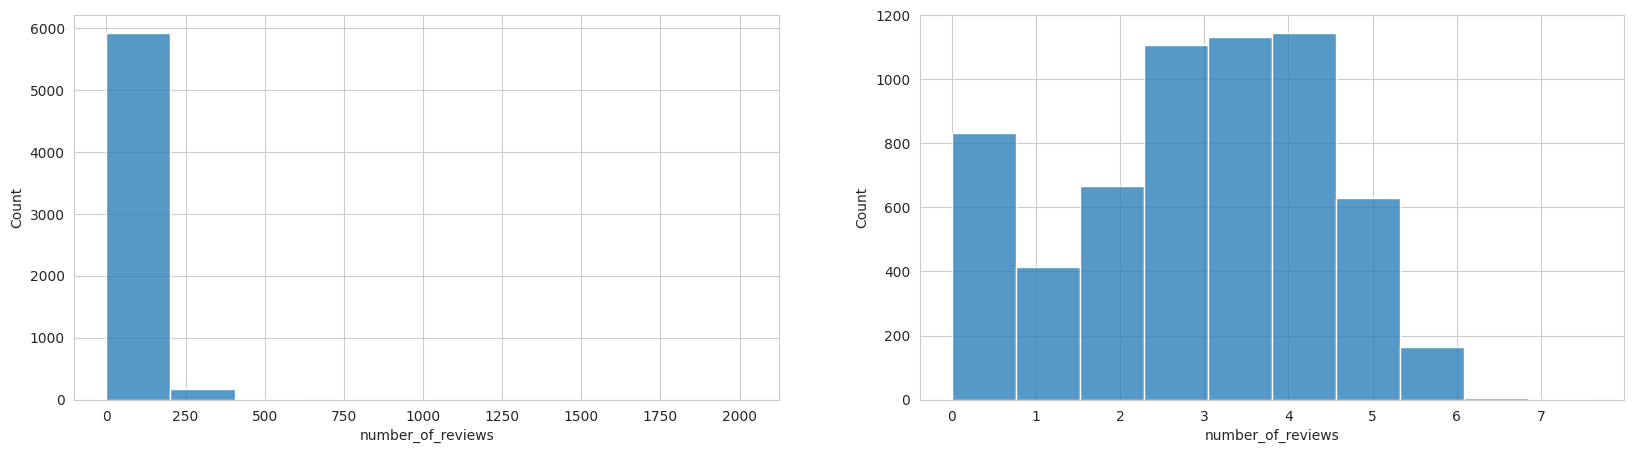

In [399]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="number_of_reviews", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="number_of_reviews", kde=False, bins=10)

<Axes: xlabel='review_scores_accuracy', ylabel='Count'>

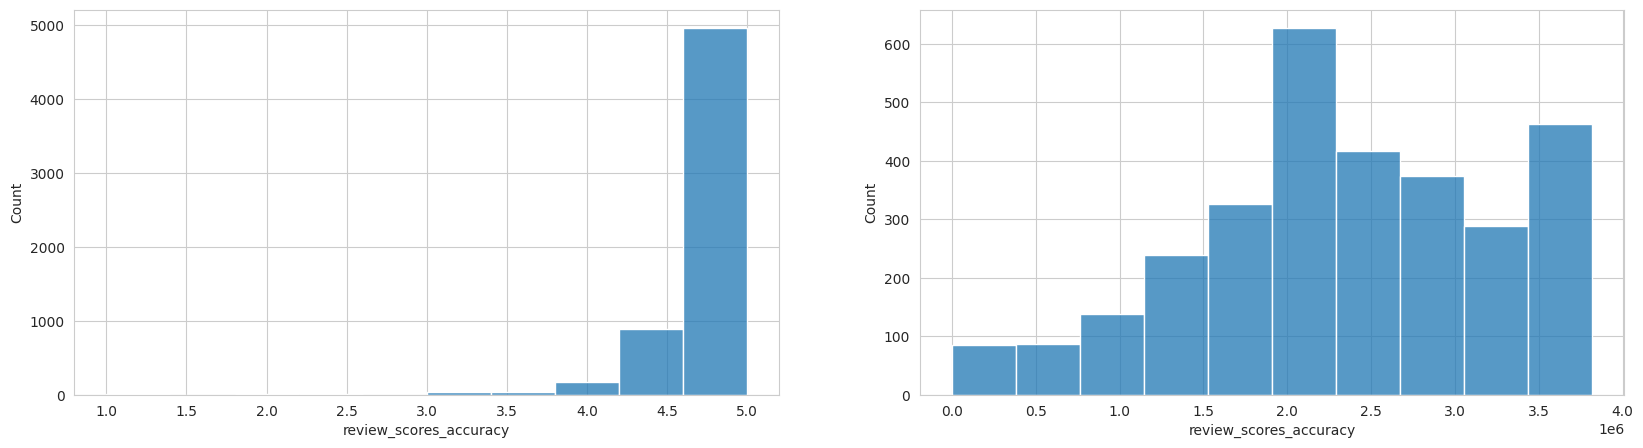

In [401]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="review_scores_accuracy", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_accuracy", kde=False, bins=10)

<Axes: xlabel='review_scores_cleanliness', ylabel='Count'>

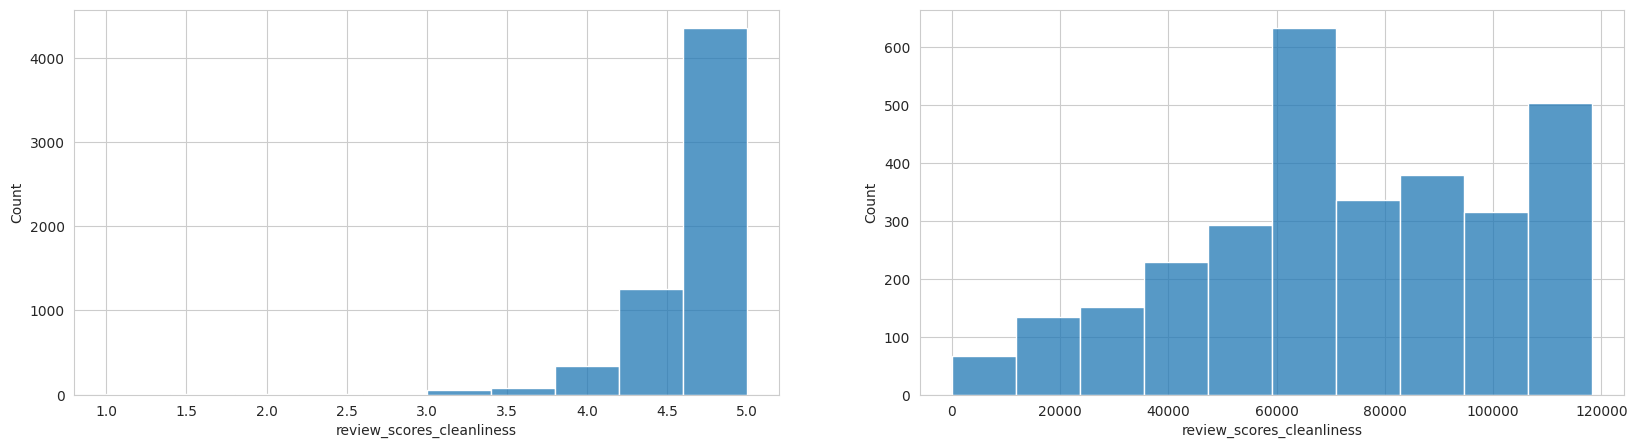

In [402]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="review_scores_cleanliness", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_cleanliness", kde=False, bins=10)

<Axes: xlabel='review_scores_checkin', ylabel='Count'>

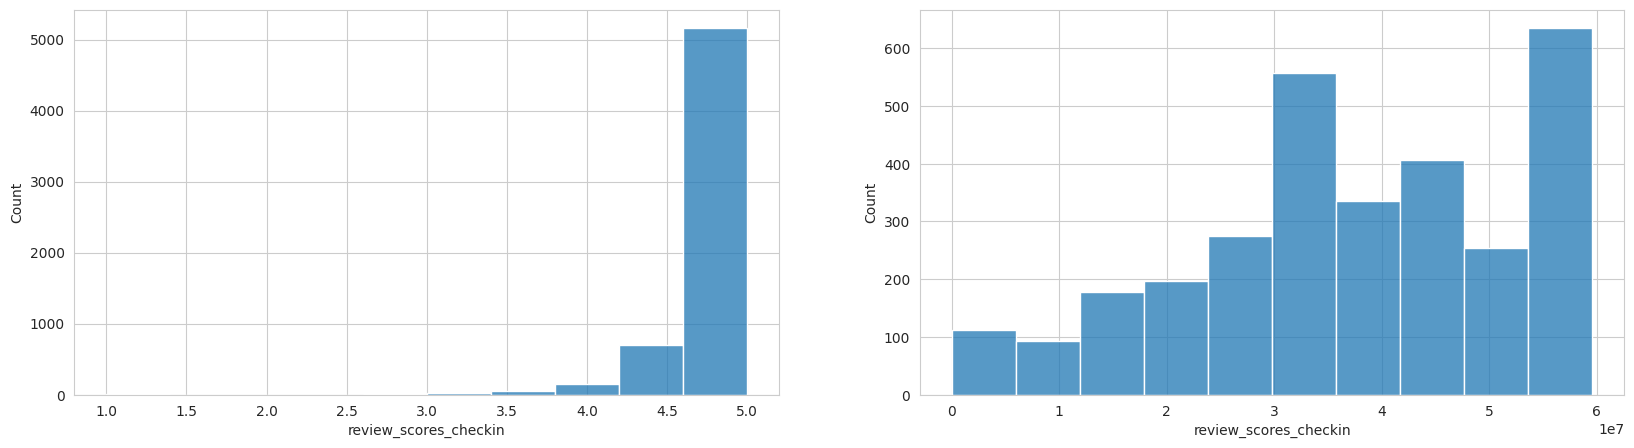

In [403]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="review_scores_checkin", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_checkin", kde=False, bins=10)

<Axes: xlabel='review_scores_communication', ylabel='Count'>

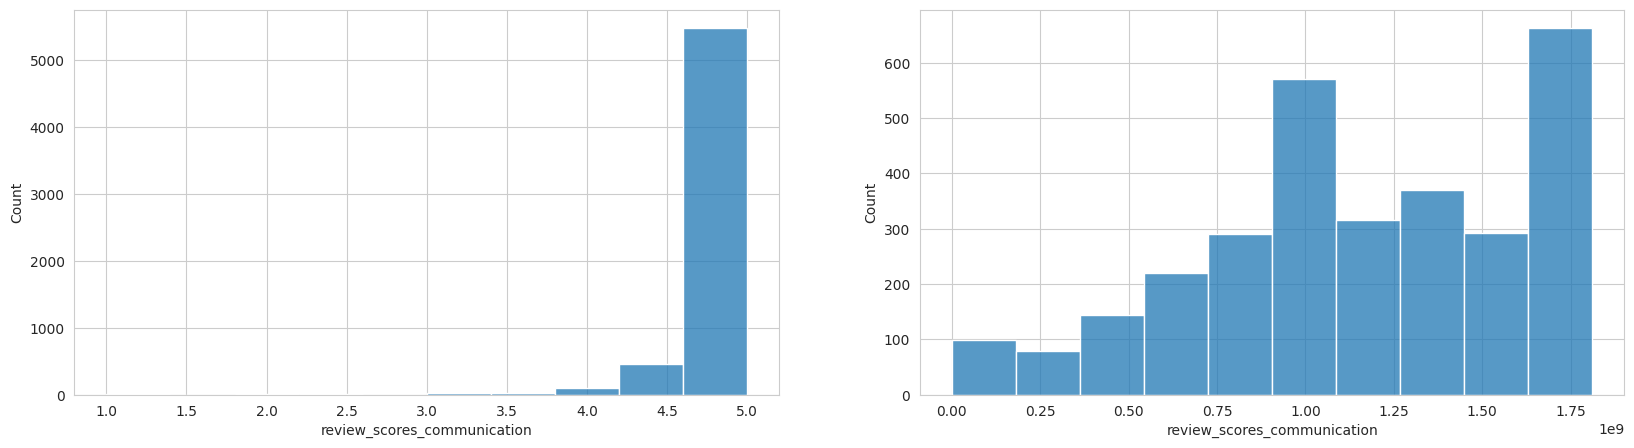

In [404]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="review_scores_communication", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_communication", kde=False, bins=10)

<Axes: xlabel='review_scores_location', ylabel='Count'>

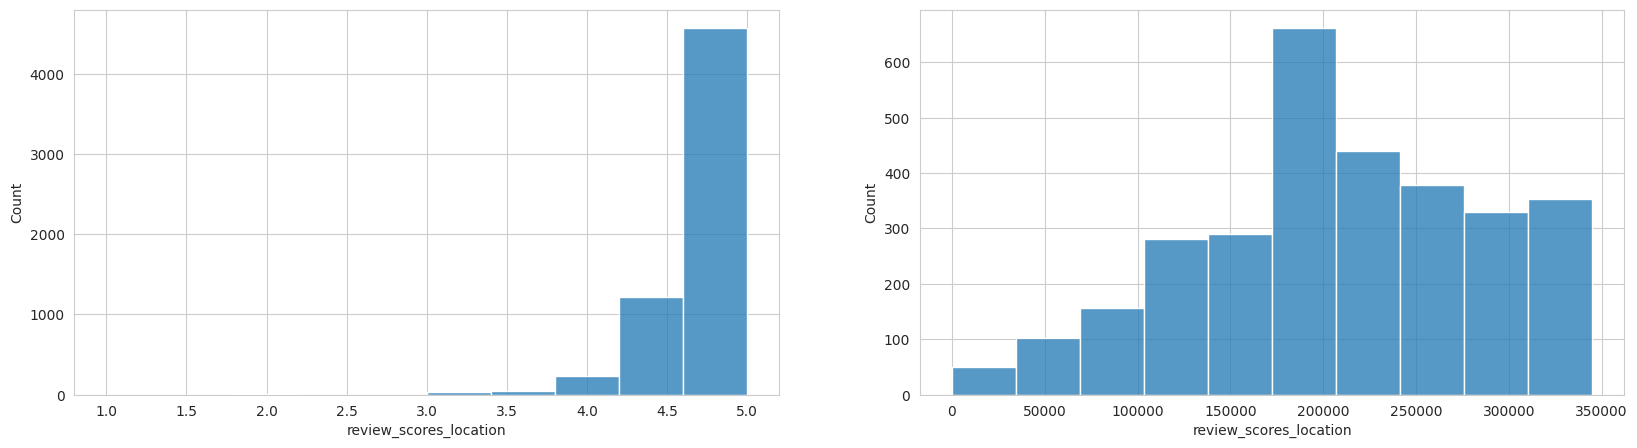

In [405]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="review_scores_location", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_location", kde=False, bins=10)

<Axes: xlabel='review_scores_value', ylabel='Count'>

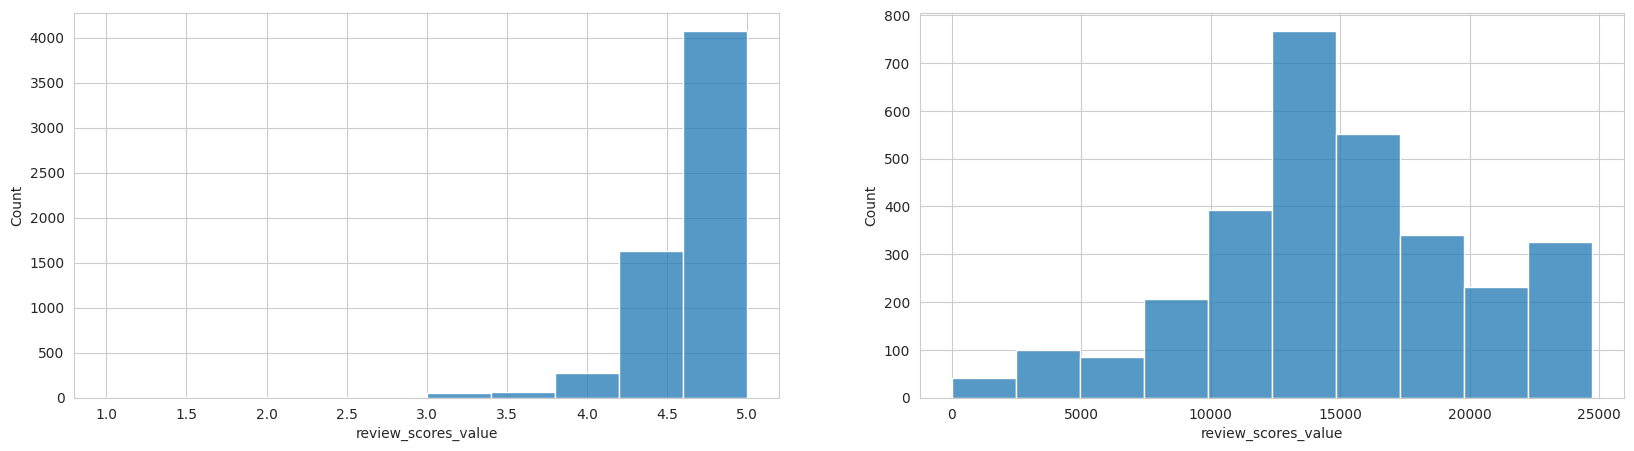

In [406]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(ax=axes[0], data=df_sec_review, x="review_scores_value", kde=False, bins=10)
sns.histplot(ax=axes[1], data=df1, x="review_scores_value", kde=False, bins=10)

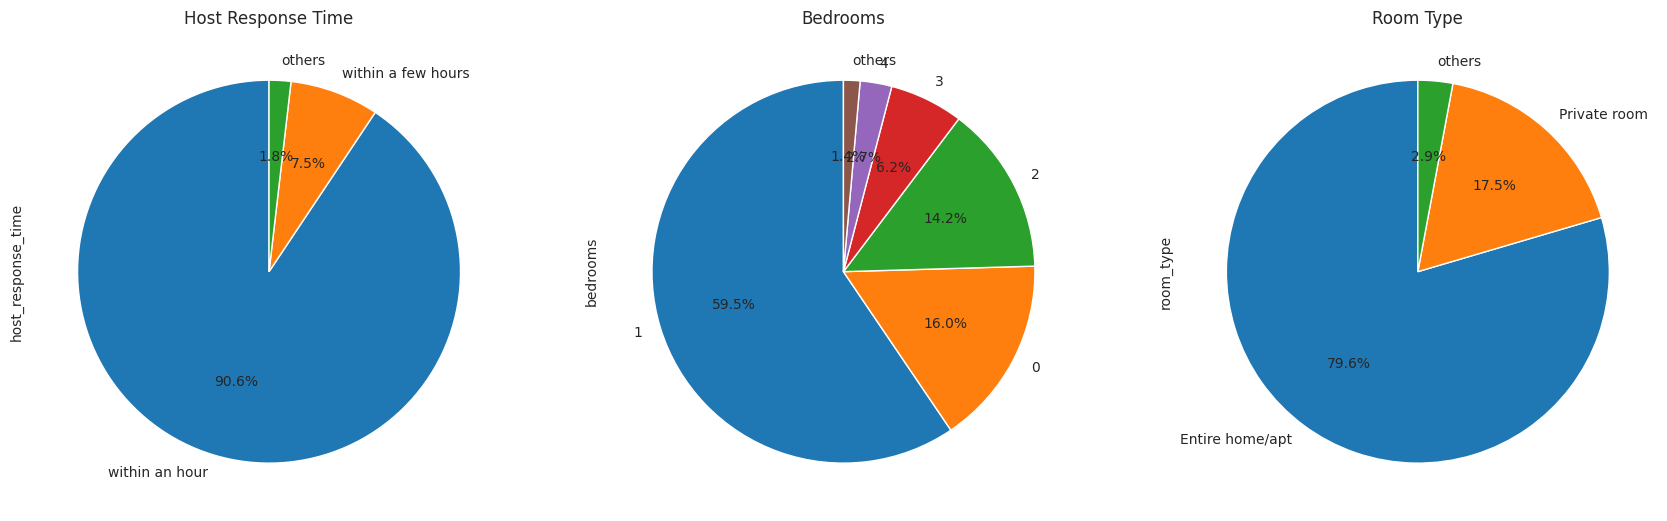

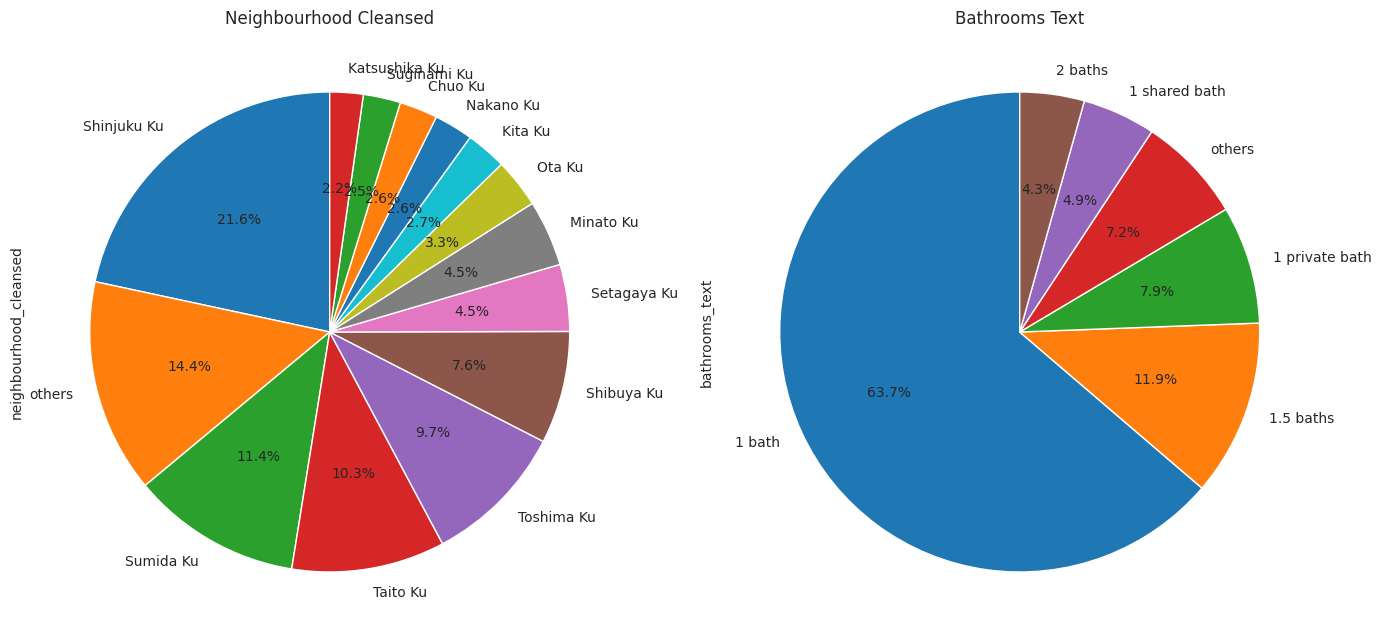

In [ ]:
#범주형 변수의 시각화(파이차트)
#값이 매우 많기 때문에 한 항목의 비율이 2%를 넘지 않는다면 others로 변환 후 시각화
cols=['host_response_time','bedrooms','room_type','neighbourhood_cleansed','bathrooms_text']
df_pie = df[cols].copy()

df_pie['bedrooms'] = df_pie['bedrooms'].astype(object)

for column in cols:
    value_counts = df[column].value_counts()
    threshold = 0.02 * len(df)
    other_items = value_counts[value_counts < threshold].index
    df_pie[column] = df_pie[column].replace(other_items, 'others')

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
df_pie['host_response_time'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Host Response Time')

df_pie['bedrooms'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Bedrooms')

df_pie['room_type'].value_counts().plot.pie(ax=axes[2], autopct='%1.1f%%', startangle=90)
axes[2].set_title('Room Type')

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
df_pie['neighbourhood_cleansed'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Neighbourhood Cleansed')

df_pie['bathrooms_text'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Bathrooms Text')

plt.tight_layout()
plt.show()


데이터 처리 단계